In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

from scipy import stats
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pd.options.mode.chained_assignment = None 
sns.set_style("darkgrid")
%matplotlib inline

In [48]:
df0 = pd.read_csv('bank-additional-full.csv', sep=';')
df0['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

#1-bo'lim: Ma'lumotlar to'plami bilan tanishish

<h1>Ushbu ma'lumotlar to'plami Lissabon, Portugaliya markaziy banki tomonidan qo'llaniladigan telemarketing kampaniyasiga tegishli. </h1>

In [26]:
df0.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
df0.shape

(41188, 21)

In [28]:
df0['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [29]:
hot_enc_def_0 = {'yes' : 1, 'no' : 0, 'unknown' : 1}
df0['default'] = df0['default'].map(lambda x: hot_enc_def_0[x])
df0.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,1,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [49]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
print(df.shape)

(41188, 21)


In [34]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#1.2: Dastlabki qidiruv
Ma'lumotlar to'plamining dastlabki ko'rinishini berish uchun dastlabki tadqiqot statistikasi yaratiladi.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [37]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [91]:
for col in df:
  print(df[col].unique())

In [40]:
df.describe().round(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


#2-bo'lim: Oldindan ishlov berish
##2.1: Ahamiyatsiz ma'lumotlarni o'chirish

'unknown' ni o'z ichiga olgan kuzatuvlar olib tashlaymiz 

In [50]:
df = df[df.job != 'unknown']
df = df[df.marital != 'unknown']
df = df[df.education != 'unknown']
df = df[df.housing != 'unknown']
df = df[df.loan != 'unknown']
df = df[df.education != 'illiterate']

df.shape

(38227, 21)

In [51]:
cols = list(df.columns.values)
cols.pop(cols.index('default'))
df = df[cols+['default']]
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,default
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,unknown
2,37,services,married,high.school,yes,no,telephone,may,mon,226,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no


In [52]:
df = df.drop(['contact', 'day_of_week', 'month', 'duration'], axis = 1)
df = df.rename(columns={'y': "deposit"})
df.head()
# y qiymatni depasitga o'zgartiramiz 

,age,job,marital,education,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,default
0,56,housemaid,married,basic.4y,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
1,57,services,married,high.school,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,unknown
2,37,services,married,high.school,yes,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
3,40,admin.,married,basic.6y,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
4,56,services,married,high.school,no,yes,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no


# Kategorik ma'lumotlarni kodlash
##Raqamli bo'lmagan  ma'lumotlar kodlangan.

In [53]:
hot_enc_1 = {'yes' : 1, 'no' : 0}
df['deposit'] = df['deposit'].map(lambda x: hot_enc_1[x])

In [54]:
hot_enc_2 = {'yes' : 1, 'no' : 0}
df['housing'] = df['housing'].map(lambda x: hot_enc_2[x])
df['loan'] = df['loan'].map(lambda x: hot_enc_2[x])

In [55]:
enc_education = {'basic.4y' : 0,
                 'basic.6y' : 1,
                 'basic.9y' : 2,
                 'high.school' : 3,
                 'university.degree' : 4,
                 'professional.course' : 5}

df['education'] = df['education'].map(lambda x: enc_education[x])

#Ish xususiyati taxminiy ish haqi bilan kodlangan. Aniq maoshi bo'lmagan ish turlari, masalan, "nafaqaga chiqqan" bularni o'rtacha ish haqi bilan almashitamiz 

In [56]:
enc_job = {'unemployed' : 0,
           'student': 10500,
           'retired' : 12500,
           'self-employed' : 12500,
           'entrepreneur' : 12500, 
           'housemaid' : 12500, 
           'blue-collar' : 14500, 
           'admin.' : 17000, 
           'services' : 20000, 
           'technician' : 24000,
           'management' : 28000}


df['job'] = df['job'].map(lambda x: enc_job[x])

In [57]:
enc_marital = {'single' : 0,
               'married' : 1,
               'divorced' : 2}

df['marital'] = df['marital'].map(lambda x: enc_marital[x])

In [ ]:
hot_enc_def = {'yes' : 1, 'no' : 0, 'unknown' : 1}

df['default'] = df['default'].map(lambda x: hot_enc_def[x]) # bunda ha yoki yo'qni 0 bilan 1 ga o'tkizamiz 
df['default'].value_counts()

##Korrelyatsiyalarni aniqlash

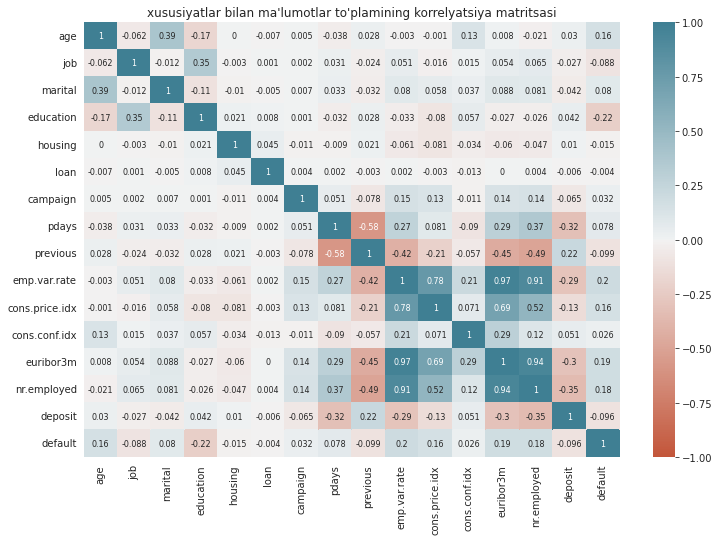

In [61]:
fig,ax = plt.subplots(1,1, figsize=(12,8))

sns.heatmap(df.corr().round(3), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 8})

_y = plt.yticks(rotation=0, fontsize=10)
_x = plt.xticks(rotation=90, fontsize=10)

plt.title("xususiyatlar bilan ma'lumotlar to'plamining korrelyatsiya matritsasi")
plt.show()

##Tahlil qilishda boshqa foydalanilmaydigan bog'liq bo'lmagan xususiyatlar o'chiramiz .

In [62]:
df = df.drop(['housing', 'loan', 'campaign', 'poutcome', 'pdays', 'previous', 'deposit'], axis = 1)
print(df.shape)
df.head()

(38227, 10)


,age,job,marital,education,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default
0,56,12500,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,20000,1,3,1.1,93.994,-36.4,4.857,5191.0,1
2,37,20000,1,3,1.1,93.994,-36.4,4.857,5191.0,0
3,40,17000,1,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,20000,1,3,1.1,93.994,-36.4,4.857,5191.0,0


In [63]:
df.describe().round(2)

,age,job,marital,education,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default
count,38227.00,38227.00,38227.00,38227.00,38227.00,38227.00,38227.00,38227.00,38227.00,38227.0
mean,39.86,17520.71,0.83,2.99,0.08,93.57,-40.54,3.62,5167.43,0.2
std,10.29,5444.72,0.60,1.47,1.57,0.58,4.62,1.73,71.76,0.4
min,17.00,0.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.0
25%,32.00,14500.00,0.00,2.00,-1.80,93.08,-42.70,1.34,5099.10,0.0
50%,38.00,17000.00,1.00,3.00,1.10,93.44,-41.80,4.86,5191.00,0.0
75%,47.00,20000.00,1.00,4.00,1.40,93.99,-36.40,4.96,5228.10,0.0
max,98.00,28000.00,2.00,5.00,1.40,94.77,-26.90,5.04,5228.10,1.0


<h2>Ma'lumotlar to'plami z-score normalizatsiyasi yordamida normallashtiramiz. 2 standart og‘ishdan yuqori yoki undan past bo‘lgan har qanday xususiyatlar cheklovchi hisoblanadi va shuning uchun olib tashlanadi. Chiqib ketishlar keyinchalik tahlil qilish uchun alohida ma'lumotlar to'plamida saqlanadi. Ma'lumotlar to'plamining natija shakli quyida keltirilgan. Chiqib ketgan ma'lumotlar to'plami df2 deb saqlaymiz. </h2>

In [64]:
df2 = df[(abs(stats.zscore(df)) < 2).all(axis=1)]
df_outliers = df[~(abs(stats.zscore(df)) < 2).all(axis=1)]

In [66]:
df2.head()

,age,job,marital,education,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default
1,57,20000,1,3,1.1,93.994,-36.4,4.857,5191.0,1
2,37,20000,1,3,1.1,93.994,-36.4,4.857,5191.0,0
3,40,17000,1,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,20000,1,3,1.1,93.994,-36.4,4.857,5191.0,0
5,45,20000,1,2,1.1,93.994,-36.4,4.857,5191.0,1


In [67]:
df_outliers.head()

,age,job,marital,education,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default
0,56,12500,1,0,1.1,93.994,-36.4,4.857,5191.0,0
13,57,12500,2,0,1.1,93.994,-36.4,4.857,5191.0,0
20,30,0,1,3,1.1,93.994,-36.4,4.857,5191.0,0
21,55,14500,1,0,1.1,93.994,-36.4,4.857,5191.0,1
33,54,28000,1,0,1.1,93.994,-36.4,4.857,5191.0,1


In [71]:
print('df shape:', df.shape)   
print('df2 shape:', df2.shape)   
print('df_outlier shape:', df_outliers.shape)  
# Ma'lumotalrimizni uchga bo'lib oldik 

df shape: (38227, 10)
df2 shape: (29961, 10)
df_outlier shape: (8266, 10)


###Asl, qayta ishlangan va o'zgaruvchan ma'lumotlar to'plamlari o'rtasidagi standart nisbatlar tahlil qilamiz

In [72]:
df0_default_yes = len(df0[df0['default']==1])   
df0_default_no = len(df0[df0['default']==0])   

df2_default_yes = len(df2[df2['default']==1])
df2_default_no = len(df2[df2['default']==0])

dfout_default_yes = len(df_outliers[df_outliers['default']==1])
dfout_default_no = len(df_outliers[df_outliers['default']==0])

df0_tot = len(df0)   # Asl dataset
df2_tot = len(df2)   # test data set dataset
dfout_tot = len(df_outliers)   # tashqarida kelgan dataset

In [ ]:
df0_default_ratio = df0_default_yes / df0_tot
df2_default_ratio = df2_default_yes / df2_tot
dfout_default_ratio = dfout_default_yes / dfout_tot

default_loss_ratio = df2_default_yes / df0_default_yes
total_loss_ratio = df2_tot / df0_tot

##Algoritmning noto'g'riligini kamaytirish uchun defoltlar soni to'lanmaganlar soniga tenglashtiriladi. Bu modelning bitta populyatsiyada ortiqcha o'qitilmasligini ta'minlaydi.

In [80]:
df_def = df2[df2['default']==1]
df_no_def = df2[df2['default']==0]
print(df_def.shape)
print(df_no_def.shape)

(5895, 10)
(24066, 10)


##BUni tahlil qilish uchun takrorlanadigan ma'lumotlar ramkasi yaratiladi 

In [81]:
n_pop = len(df_def)

df_samp_random = df_no_def.sample(n=n_pop)
df_samp_repeat = df_no_def.iloc[:n_pop, :]

Standart ma'lumotlar to'plami va takrorlanadigan ma'lumotlar to'plami birlashtiramiz. Natijada qayta ishlangan ma'lumotlar to'plami keyinchalik qatorlar tartibini tasodifiy tartibga solish uchun aralashtiriladiramiz. Yakuniy ma'lumotlar to'plami (df2) to'liq qayta ishlanadi

In [82]:
df2 = pd.concat([df_def, df_samp_repeat], axis=0)
df2 = df2.sample(frac = 1)
print(df2.shape)
df2.head()

(11790, 10)


,age,job,marital,education,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default
8467,37,24000,1,3,1.4,94.465,-41.8,4.864,5228.1,0
7606,36,14500,1,2,1.1,93.994,-36.4,4.864,5191.0,0
5012,33,20000,1,3,1.1,93.994,-36.4,4.858,5191.0,1
8330,38,12500,1,1,1.4,94.465,-41.8,4.864,5228.1,0
6776,42,24000,0,2,1.1,93.994,-36.4,4.857,5191.0,0


#Visualizatsiya

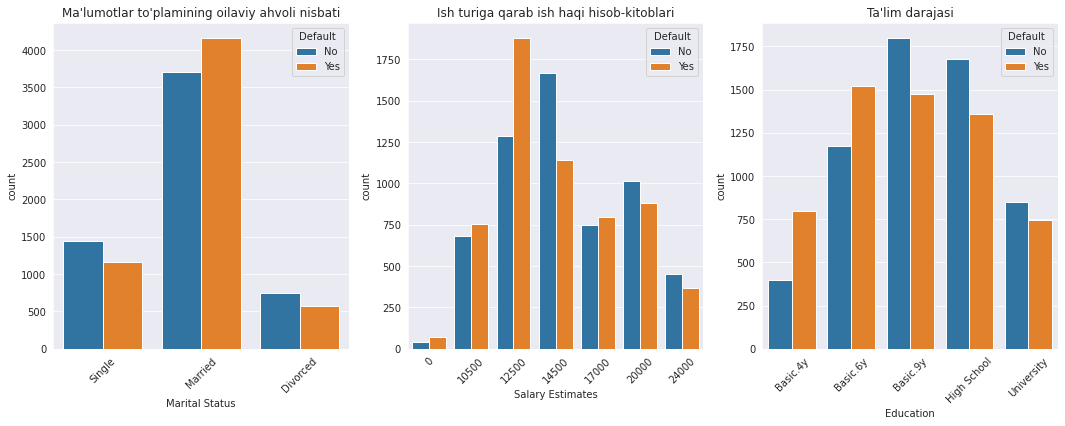

In [84]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

g2 = sns.countplot(x='marital', data=df2, hue='default', ax=axes[0])
g2.set_xticklabels(['Single', 'Married', 'Divorced'])
g2.set_xlabel('Marital Status')
axes[0].set_title("Ma'lumotlar to'plamining oilaviy ahvoli nisbati")
axes[0].tick_params('x', labelrotation=45)
axes[0].legend(labels=["No","Yes"], title = "Default")

g3 = sns.countplot(x='job',data=df2, hue='default', ax=axes[1])
g3.set_xticklabels(['0', '10500', '12500', '14500', '17000', '20000', '24000', '28000'])
g3.set_xlabel('Salary Estimates')
axes[1].set_title("Ish turiga qarab ish haqi hisob-kitoblari")
axes[1].tick_params('x', labelrotation=45)
axes[1].legend(labels=["No","Yes"], title = "Default")

g4 = sns.countplot(x='education',data=df2, hue='default', ax=axes[2])
g4.set_xticklabels(['Basic.4y', 'Basic.6y', 'Basic.9y', 'High School', 'University', 'Professional Course'])
g4.set_xlabel('Education')
axes[2].set_title("Ta'lim darajasi")
axes[2].tick_params('x', labelrotation=45)
axes[2].legend(labels=["No","Yes"], title = "Default")

plt.show()

##Yosh taqsimoti

In [85]:
max_age0 = df0['age'].unique()
max_age2 = df2['age'].unique()

min_ages = df0['age'].min()
max_ages = min_ages + len(max_age2)
new_age_range = range(min_ages, max_ages)

print("yoshi oralig'i", min_ages, 'dan', df0['age'].max(),"asl ma'lumotlar to'plami uchun")
print("Yosh oraligi", min_ages, 'dan', max_ages,"qayta ishlangan ma'lumotlar to'plami uchun")

yoshi oralig'i 17 dan 98 asl ma'lumotlar to'plami uchun
Yosh oraligi 17 dan 58 qayta ishlangan ma'lumotlar to'plami uchun


In [86]:
age_lt_34 = df2[df2['age']<34]     # Mijozlarning ma'lumotlar to'plami gt yoki lt yoshi
age_gt_40 = df2[df2['age']>40]     # lt = kamroq,  gt = dan kattaroq

n_age_lt_34 = len(df2[df2['age']<34])     # Har bir ma'lumot to'plamining uzunligi
n_age_gt_40 = len(df2[df2['age']>40])

age_34_0 = len(age_lt_34[age_lt_34['default']==0])
age_34_1 = len(age_lt_34[age_lt_34['default']==1])

age_40_0 = len(age_gt_40[age_gt_40['default']==0])
age_40_1 = len(age_gt_40[age_gt_40['default']==1])

ratio_lt_34 = age_34_1 / n_age_lt_34
ratio_gt_40 = age_40_1 / n_age_gt_40

print("34 yoshdan kichik bo'lmaganlar nisbati:", round(ratio_lt_34*100, 2), '%')
print("40 yoshdan oshgan qarzdorlar nisbati:", round(ratio_gt_40*100, 2), '%')

34 yoshdan kichik bo'lmaganlar nisbati: 38.26 %
40 yoshdan oshgan qarzdorlar nisbati: 59.94 %


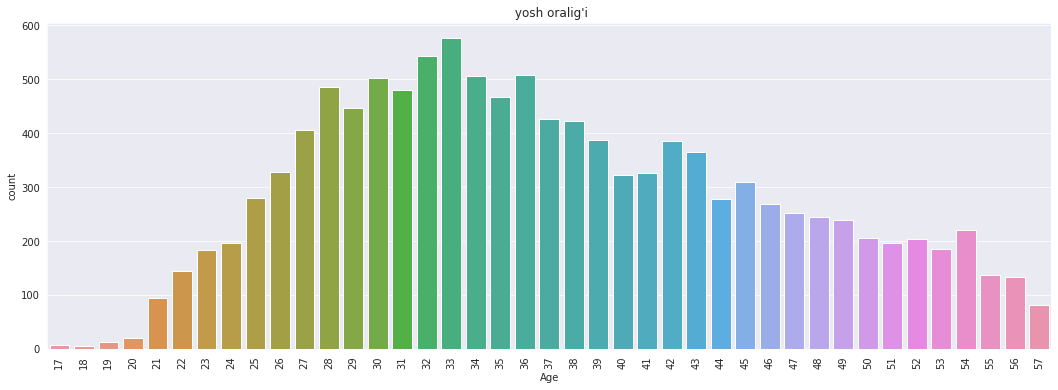

In [88]:
fig,ax = plt.subplots(1,1, figsize=(18,6))

age = sns.countplot(x='age',data=df2)

plt.title(" yosh oralig'i")
plt.xticks(rotation=90)
age.set_xticklabels(new_age_range)
ax.set_xlabel('Age')
plt.show()

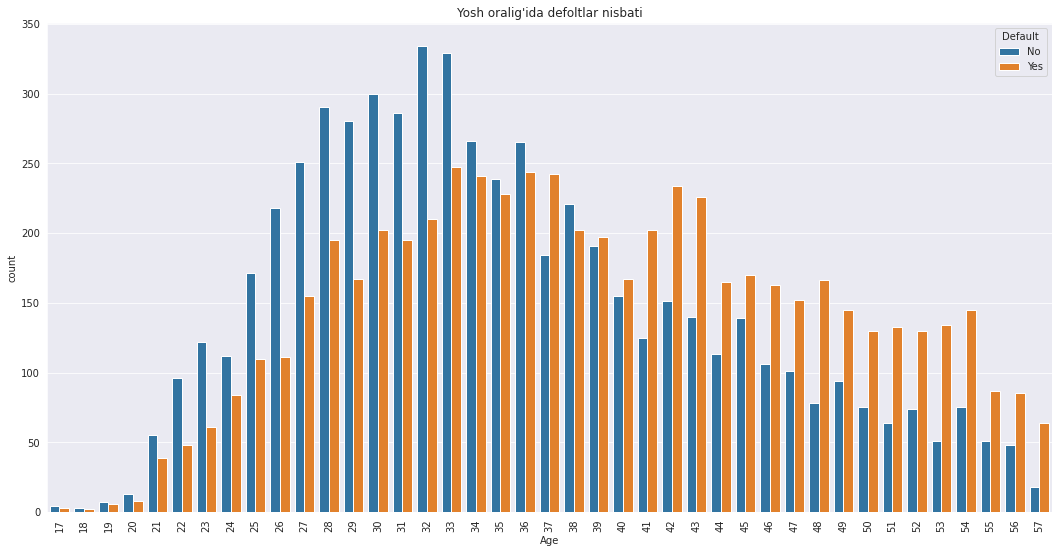

In [89]:
fig,ax = plt.subplots(1,1, figsize=(18,9))

age2 = sns.countplot(x='age', data=df2, hue='default')

plt.legend(labels=["No","Yes"], title = "Default")
plt.title("Yosh oralig'ida defoltlar nisbati")
plt.xticks(rotation=90)
age2.set_xticklabels(new_age_range)
ax.set_xlabel('Age')
plt.show()

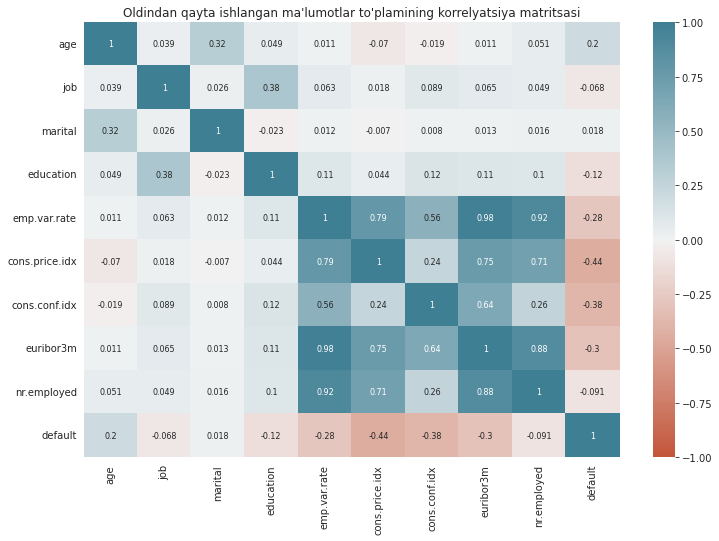

In [90]:
fig,ax = plt.subplots(1,1, figsize=(12,8))

sns.heatmap(df2.corr().round(3), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 8})

_y = plt.yticks(rotation=0, fontsize=10)
_x = plt.xticks(rotation=90, fontsize=10)

plt.title("Oldindan qayta ishlangan ma'lumotlar to'plamining korrelyatsiya matritsasi")
plt.show()

In [92]:
cor1 = df2.corr()
cor1 = cor1[['default']].iloc[:-1,:]
cor1 = cor1.sort_values(by='default', ascending=False)

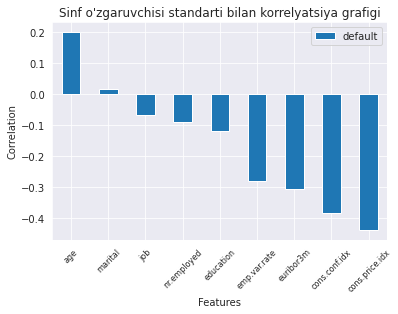

In [93]:
cor1.plot.bar()
plt.xlabel("Features", fontsize=10)
plt.ylabel("Correlation", fontsize=10)
plt.xticks(fontsize=8, rotation=45)
plt.title("Sinf o'zgaruvchisi standarti bilan korrelyatsiya grafigi")

plt.show()

##4: Ma'lumotlar to'plamini bo'lish bunda biz 
## trean_set, test_set larga bo'lamiz 

In [94]:
X = df2.drop('default',axis = 1).values
y = df2['default'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [95]:
print(df2.shape)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(11790, 10)
(11790, 9)
(9432, 9)
(2358, 9)


#Model Training va Validation qismlari 
##Normalizatsiya ishlatgan holda ma'lumotlarizni normallashtiramiz 

In [96]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

##Principle Component Analysis (PCA) ma'lumotlarning o'lchamini kamaytirish uchun ishlatiladi.

In [97]:
pca = PCA(n_components=9)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)

In [98]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))

#Turli xil modellarni natijalarini chiqaramiz 

In [99]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=9)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)
    
    # XGB: 0.8007845631891434 @ <2
    # XGB: 0.7960308590492077 @ <3

LR: 0.7913486005089059
LDA: 0.785941475826972
KNN: 0.7831849024597116
Decison-Tree: 0.7806403731976251
RandForest: 0.799830364715861
SVM: 0.7951653944020357
XGB: 0.7968617472434266


# Modelimizni test qilamiz 

In [100]:
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)

In [101]:
pca.fit(X_test)
X_test = pca.fit_transform(X_test)

In [102]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
predictions_xgb = xgb.predict(X_test)

#Model Metrics

In [103]:
accuracy = accuracy_score(Y_test, predictions_xgb)

In [104]:
class_rep_t = classification_report(Y_test, predictions_xgb, output_dict=True)
df_cr = pd.DataFrame(class_rep_t)
df_cr = df_cr.T

df_cr = df_cr.drop(labels='accuracy', axis=0)
acc_df = pd.DataFrame([['', '', '0.79', '2358.0']], index=['accuracy'], columns=['precision', 'recall', 'f1-score', 'support'])

df_cr = df_cr.rename({ '0' : "Default" ,
                       '1' : 'Non Default'}, axis=0)

crf = df_cr.round(2)
crf = pd.concat([crf, acc_df])

In [105]:
labels = ['Default','Non Default']
df_heatmap2 = pd.DataFrame(confusion_matrix(Y_test, predictions_xgb), index=labels, columns=labels)

Accuracy :  0.7828668363019508 

Classification Report:


,precision,recall,f1-score,support
Default,0.72,0.91,0.8,1148.0
Non Default,0.89,0.66,0.76,1210.0
macro avg,0.8,0.79,0.78,2358.0
weighted avg,0.81,0.78,0.78,2358.0
accuracy,,,0.79,2358.0



 Confusion Matrix:


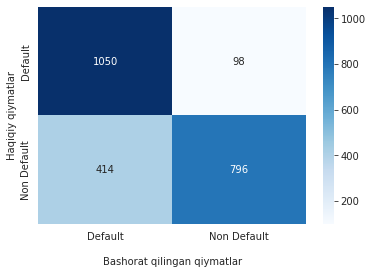

In [110]:
print("Accuracy : ", accuracy,'\n')

print('Classification Report:')
display(crf)
# plt.figure(figsize=(16,6))
print('\n', 'Confusion Matrix:')
heatmap = sns.heatmap(df_heatmap2, annot=True, fmt="d", cmap='Blues')
heatmap.set_xlabel('\nBashorat qilingan qiymatlar')
heatmap.set_ylabel('Haqiqiy qiymatlar')
plt.show()